In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import numpy as np
from matplotlib import pyplot as plt
from environments.gridworlds.gridworlds_classic import SimpleGrid
from plots.gridworlds.gridworld_visualizer import GridWorldVisualizer
from agents.pgp.pgp_softmax import SoftMaxPGP
from utils.policy_functions import *

np.set_printoptions(precision=2)

In [81]:
do_training = False

world = SimpleGrid()
viz = GridWorldVisualizer(world)
agent = SoftMaxPGP(world, gamma=0.95, p0_func=p0_onehot)
viz.agent = agent

/home/fran-tr/Workspace/gpp_core/utils/policy_functions.py:43: RuntimeWarning: divide by zero encountered in log
  return np.log(agent.A / np.sum(agent.A, axis=1, keepdims=True))


In [82]:
if do_training:
    
    agent.reset()

    # Training parameters
    n_steps=10000
    alpha=0.1

    # Training
    agent.learn(n_steps=n_steps, alpha=alpha)

### Policy

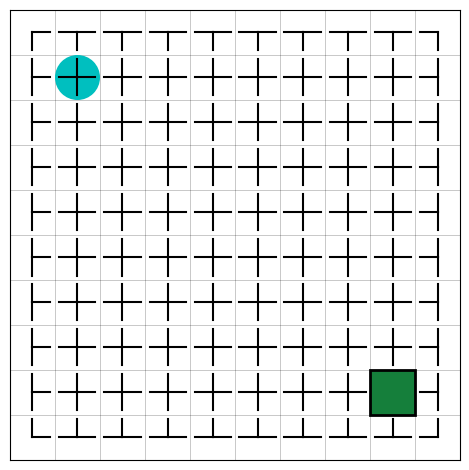

In [83]:
viz.plot_policy(plot_axis=False)
plt.tight_layout()
plt.show()

## Counter Functions:

In [84]:
s_p33 = world.encode([3, 3])
s_p51 = world.encode([5, 1])
s_p68 = world.encode([6, 8])
s_p99 = world.encode([9, 9])

states = [s_p33, s_p51, s_p68, s_p99]
state_labels = ["<3,3>", "<5,1>", "<6,8>", "<9,9>"]

actions = [0, 1, 2, 3]
action_labels = ["up", "right", "down", "left"]

### State counters


η_s0=<3,3>(s) = 


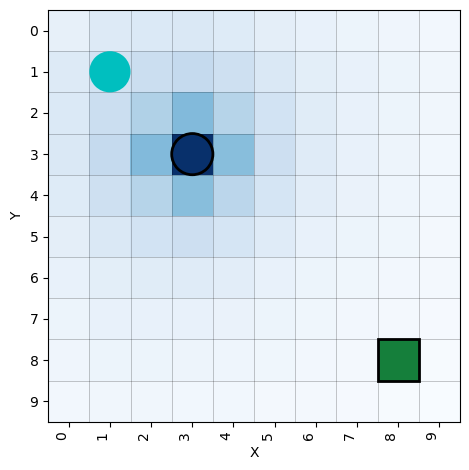


η_s0=<5,1>(s) = 


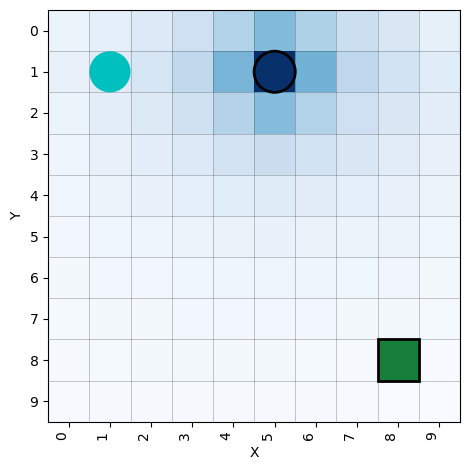


η_s0=<6,8>(s) = 


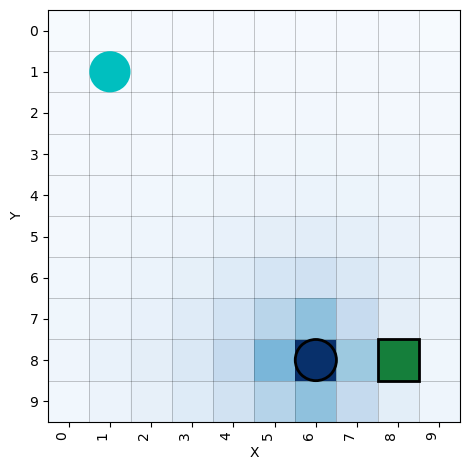


η_s0=<9,9>(s) = 


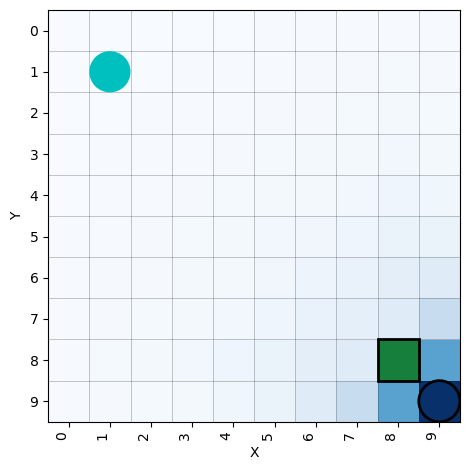

In [85]:
for s, l in zip(states, state_labels):
    v = agent.SR[s, :]
    v[world.states_terminal] = 0

    print("")
    print("η_s0={}(s) = ".format(l))
    viz.plot_grid(v)
    viz.plot_maze()
    viz.plot_states([s], ["black"], shape="circle", ax=None, full_color=False)
    plt.tight_layout()
    plt.show()

Action Counters


η_s0=<3,3>(s, a) = 


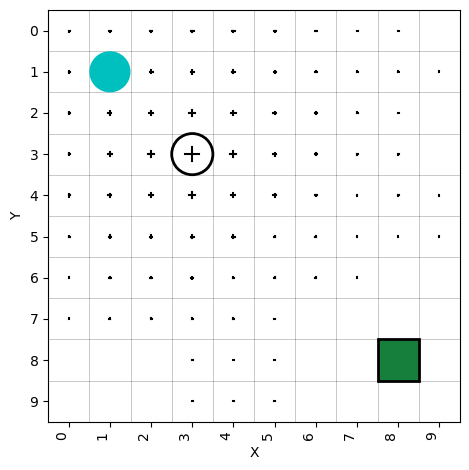


η_s0=<5,1>(s, a) = 


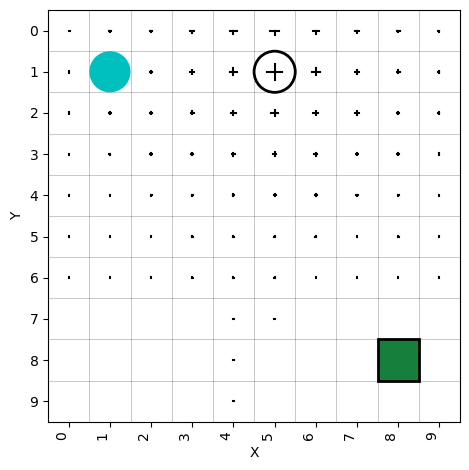


η_s0=<6,8>(s, a) = 


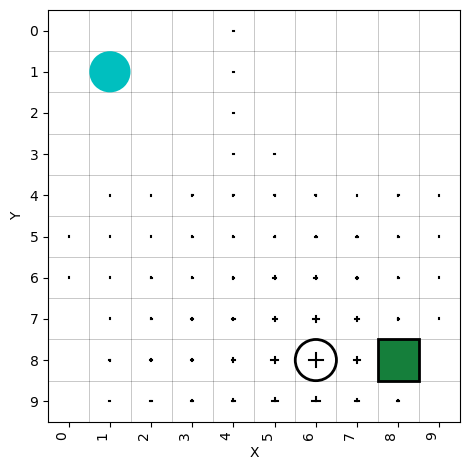


η_s0=<9,9>(s, a) = 


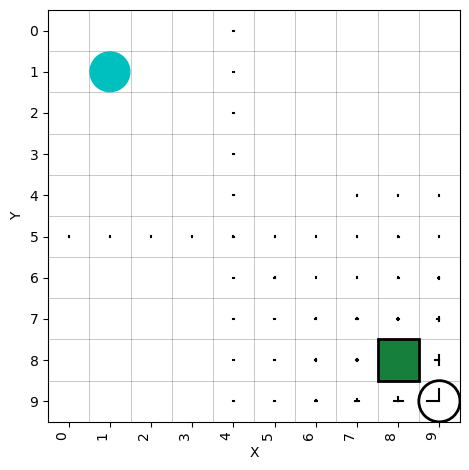

In [86]:
Cs0_a = np.einsum("oi, ij -> oij", agent.SR, agent.policy_vec())


for s, l in zip(states, state_labels):
    C_a = Cs0_a[s, :, :]
    C_a[world.states_terminal, :] = 0
    print("")
    print("η_s0={}(s, a) = ".format(l))
    viz.plot_policy(C_a, plot_maze=False, normalize=False)
    viz.plot_maze()
    viz.plot_states([s], ["black"], shape="circle", ax=None, full_color=False)
    plt.tight_layout()
    plt.show()

### State-to-state Correlations


ζ_s0=<1,1>(<3,3>, s) = 


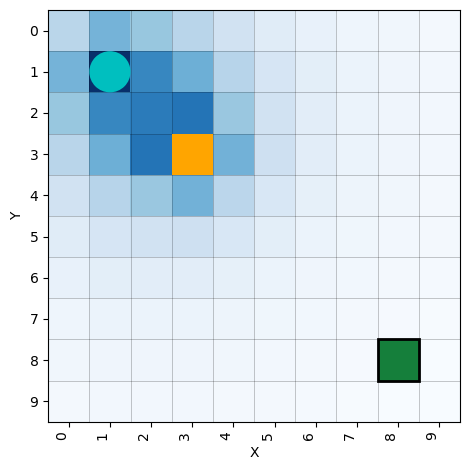


ζ_s0=<1,1>(<5,1>, s) = 


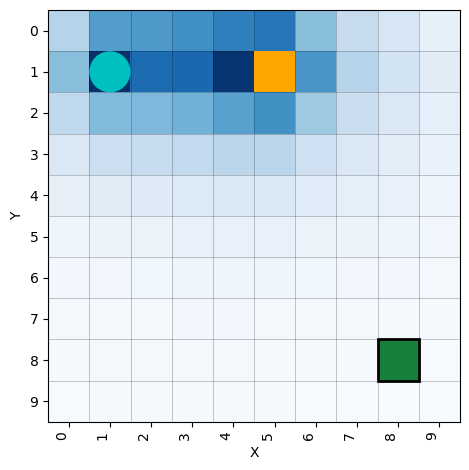


ζ_s0=<1,1>(<6,8>, s) = 


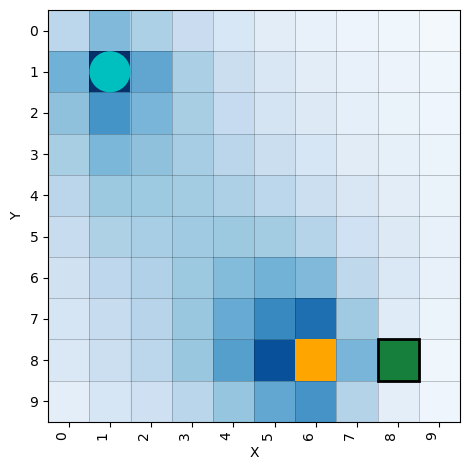


ζ_s0=<1,1>(<9,9>, s) = 


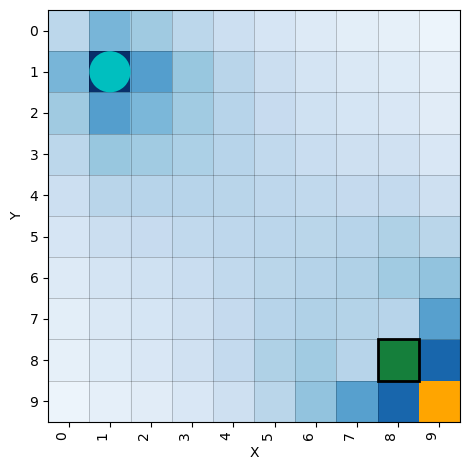

In [87]:
CC_ss = agent.CorrCount_SS
s0 = world.decode(agent.state)

for s, l in zip(states, state_labels):

    print("")
    print("ζ_s0=<{},{}>({}, s) = ".format(s0[0], s0[1], l))
    viz.plot_moment(CC_ss, s)
    viz.plot_maze()
    plt.tight_layout()
    plt.show()

### State-to-action Correlations


ζ_s0=<1,1>(<3,3>, [s,a]) = 


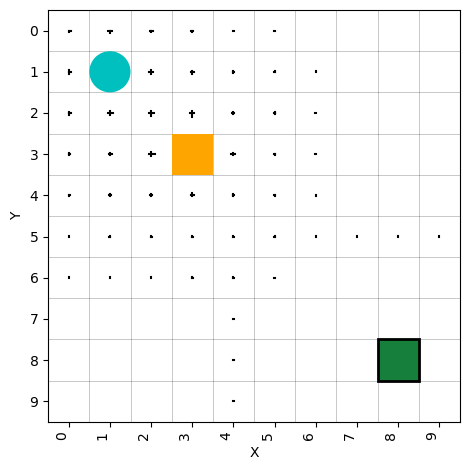


ζ_s0=<1,1>(<5,1>, [s,a]) = 


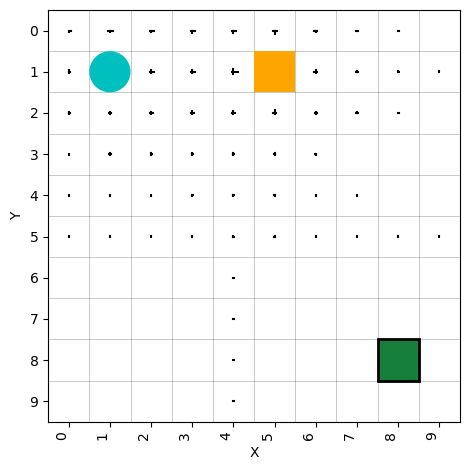


ζ_s0=<1,1>(<6,8>, [s,a]) = 


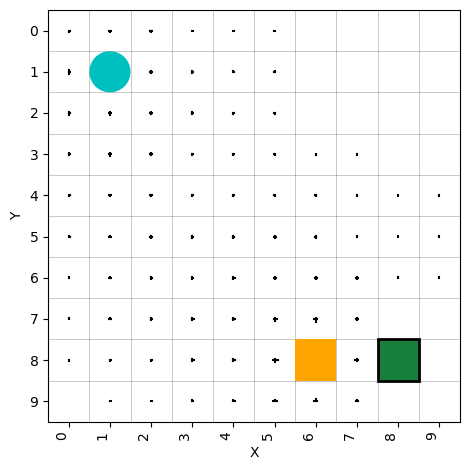


ζ_s0=<1,1>(<9,9>, [s,a]) = 


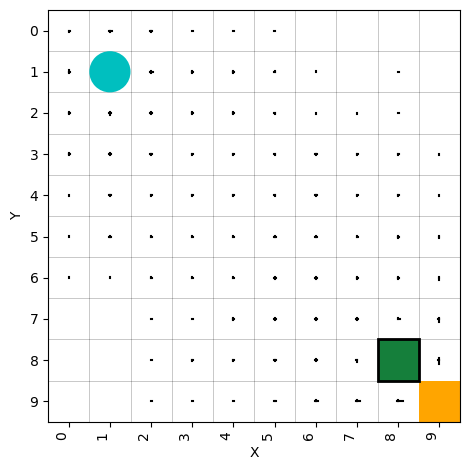

In [88]:
CC_sa = agent.CorrCount_SA
s0 = world.decode(agent.state)

for s, l in zip(states, state_labels):

    print("")
    print("ζ_s0=<{},{}>({}, [s,a]) = ".format(s0[0], s0[1], l))
    viz.plot_moment(CC_sa, s)
    viz.plot_maze()
    plt.tight_layout()
    plt.show()

### Action-to-state Correlations


ζ_s0=<1,1>([<3,3>, up], s) = 


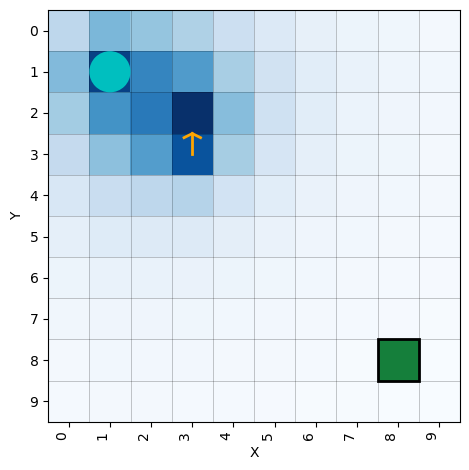


ζ_s0=<1,1>([<5,1>, right], s) = 


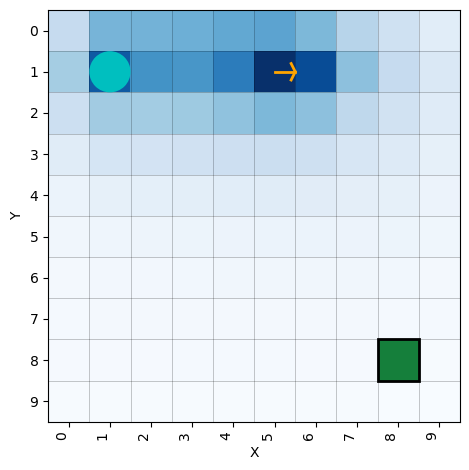


ζ_s0=<1,1>([<6,8>, down], s) = 


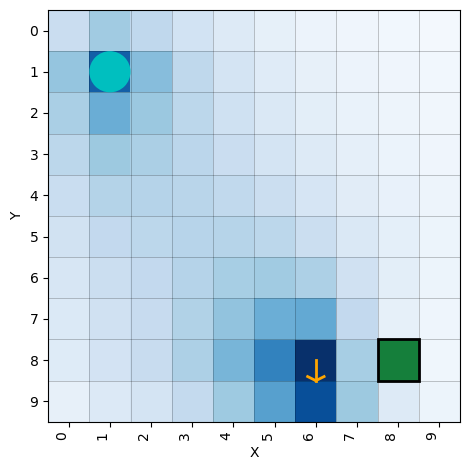


ζ_s0=<1,1>([<9,9>, left], s) = 


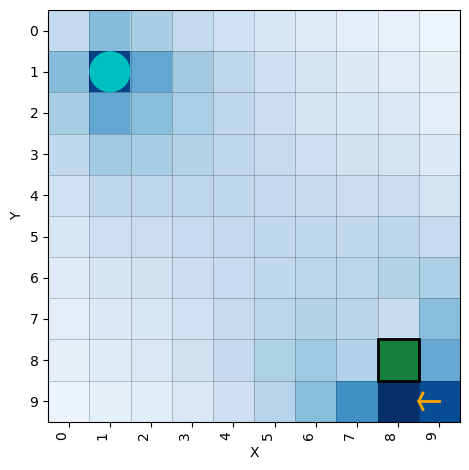

In [89]:
CC_as = agent.CorrCount_AS
s0 = world.decode(agent.state)

for s, a, sl, al in zip(states, actions, state_labels, action_labels):

    print("")
    print("ζ_s0=<{},{}>([{}, {}], s) = ".format(s0[0], s0[1], sl, al))
    viz.plot_moment(CC_as, s, a)
    viz.plot_maze()
    plt.tight_layout()
    plt.show()

### Action-to-action Correlations


ζ_s0=<1,1>([<3,3>, up], [s, a]) = 


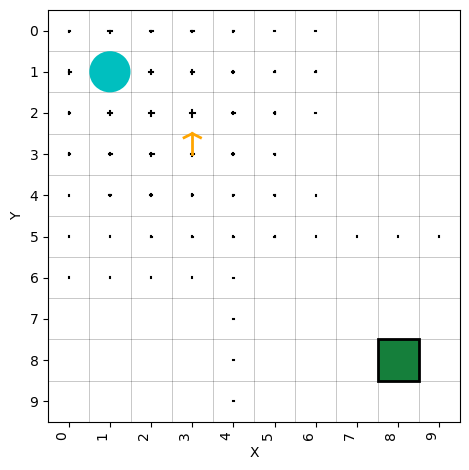


ζ_s0=<1,1>([<5,1>, right], [s, a]) = 


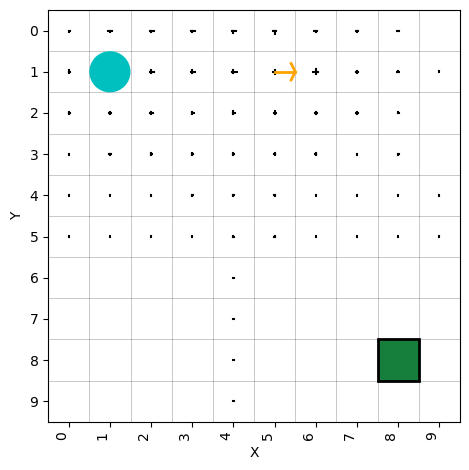


ζ_s0=<1,1>([<6,8>, down], [s, a]) = 


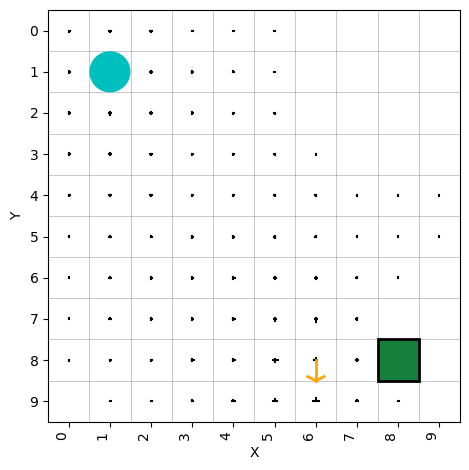


ζ_s0=<1,1>([<9,9>, left], [s, a]) = 


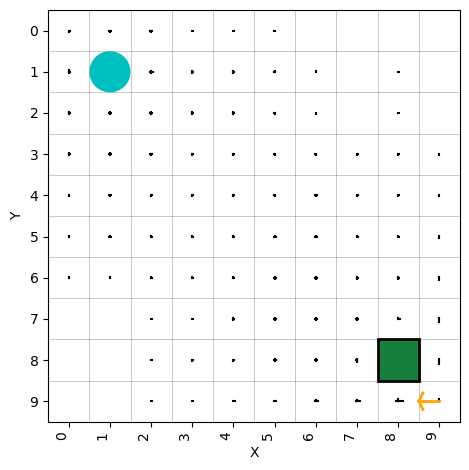

In [90]:
CC_aa = agent.CorrCount_AA
s0 = world.decode(agent.state)

for s, a, sl, al in zip(states, actions, state_labels, action_labels):

    print("")
    print("ζ_s0=<{},{}>([{}, {}], [s, a]) = ".format(s0[0], s0[1], sl, al))
    viz.plot_moment(CC_aa, s, a)
    viz.plot_maze()
    plt.tight_layout()
    plt.show()

### Fisher Information Criterion


FIM_s0=<1,1>([<3,3>, up], [s, a]) = 


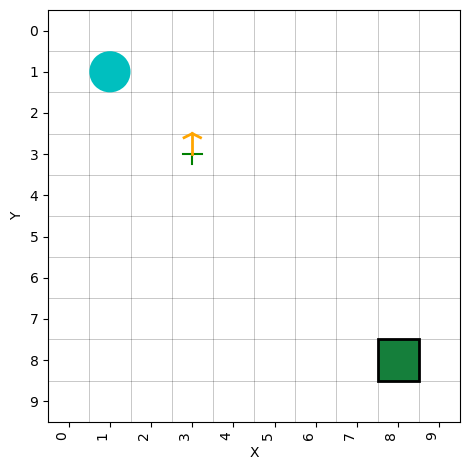


FIM_s0=<1,1>([<5,1>, right], [s, a]) = 


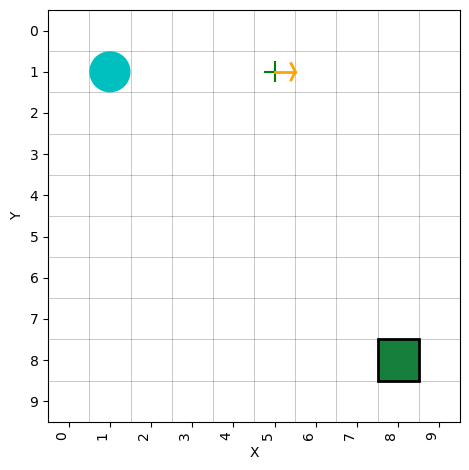


FIM_s0=<1,1>([<6,8>, down], [s, a]) = 


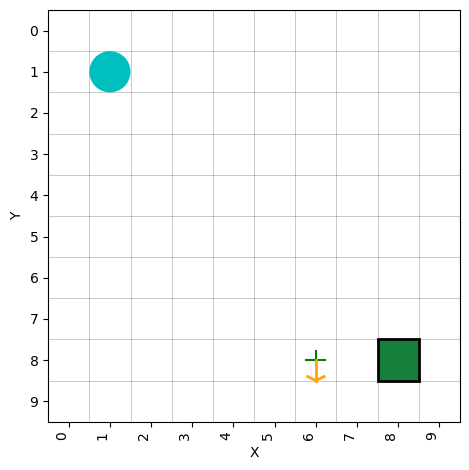


FIM_s0=<1,1>([<9,9>, left], [s, a]) = 


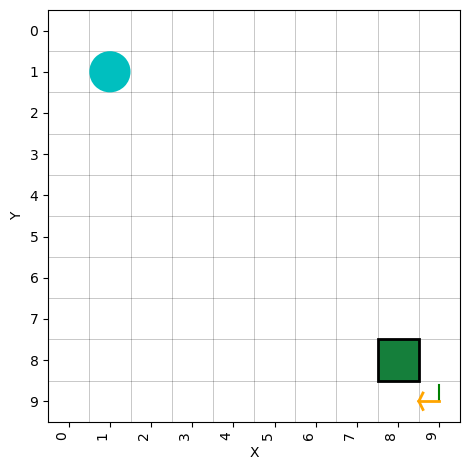


FIMInv_s0=<1,1>([<3,3>, up], [s, a]) = 


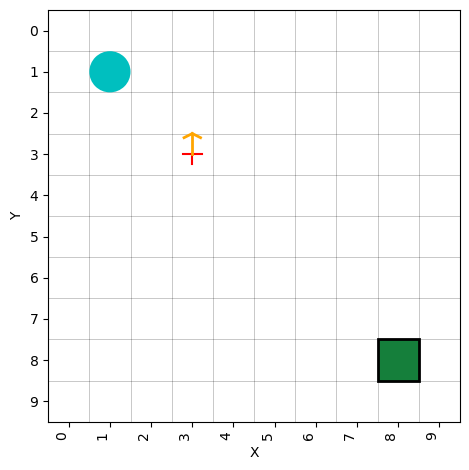


FIMInv_s0=<1,1>([<5,1>, right], [s, a]) = 


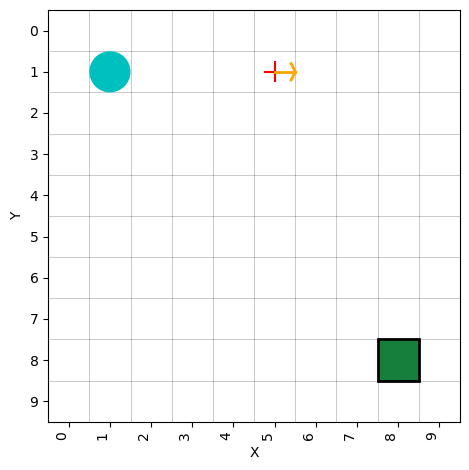


FIMInv_s0=<1,1>([<6,8>, down], [s, a]) = 


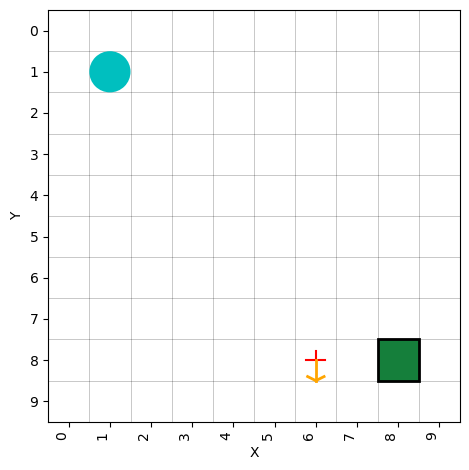


FIMInv_s0=<1,1>([<9,9>, left], [s, a]) = 


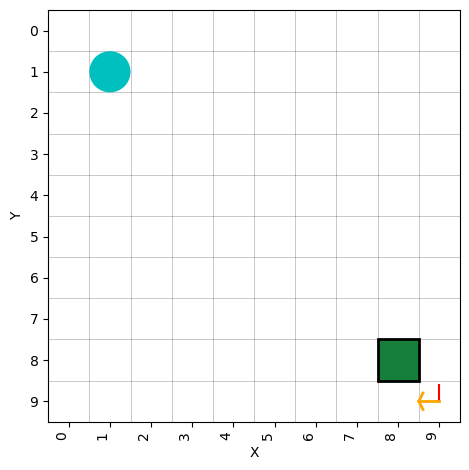

In [91]:
s0 = world.decode(agent.state)

FIM = agent.FIM(hessian_implementation=False, two_dims=False)
FIM2  = FIM.reshape([agent.n_state*agent.n_action, agent.n_state*agent.n_action])
FIMInv2 = np.linalg.pinv(FIM2)
FIMInv = FIMInv2.reshape([agent.n_state, agent.n_action, agent.n_state, agent.n_action])


for s, a, sl, al in zip(states, actions, state_labels, action_labels):

    print("")
    print("FIM_s0=<{},{}>([{}, {}], [s, a]) = ".format(s0[0], s0[1], sl, al))
    viz.plot_moment(FIM, s, a)
    viz.plot_maze()
    plt.tight_layout()
    plt.show()


for s, a, sl, al in zip(states, actions, state_labels, action_labels):

    print("")
    print("FIMInv_s0=<{},{}>([{}, {}], [s, a]) = ".format(s0[0], s0[1], sl, al))
    viz.plot_moment(FIMInv, s, a)
    viz.plot_maze()
    plt.tight_layout()
    plt.show()

100%|██████████| 500/500 [00:00<00:00, 660.76it/s]


<Axes: xlabel='X', ylabel='Y'>

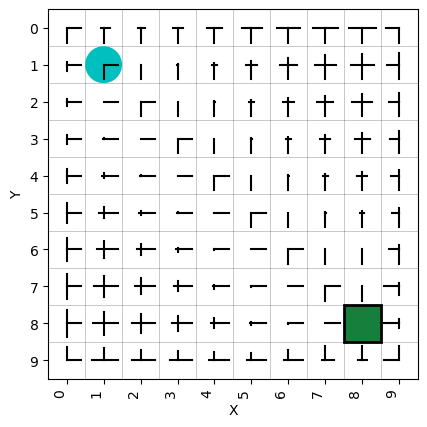

In [92]:
agent.learn(n_steps=500)
viz.plot_policy()

In [1]:
FIM = agent.FIM()
FIM_inv = np.linalg.inv(FIM)
print("Fisher information matrix has shape = {} and rank = {}".format(FIM.shape, np.linalg.matrix_rank(FIM)))
print("Showing the first 50 rows/columns of FI Matrix:")

plt.imshow(FIM[:50, :50], cmap="bwr", vmin=-np.max(np.abs(FIM[:50, :50])), vmax=np.max(np.abs(FIM[:50, :50])))
plt.tight_layout()
plt.title("FIM")
plt.show()

plt.imshow(FIM_inv[:50, :50], cmap="bwr", vmin=-np.max(np.abs(FIM_inv[:50, :50])), vmax=np.max(np.abs(FIM_inv[:50, :50])))
plt.tight_layout()
plt.title("FIM inverse")
plt.show()

print("FIM is positive definite: {}".format(np.all(np.linalg.eigvals(FIM) > 0)))
print("FIM inverse is positive definite: {}".format(np.all(np.linalg.eigvals(FIM_inv) > 0)))


NameError: name 'agent' is not defined